In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib
# Colab 런타임 다시 시작

In [3]:
!pip install konlp > /dev/null

In [14]:
!pip install konlpy > /dev/null

In [15]:
import numpy as np
import matplotlib as mpl
import konlp
import konlpy
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'NanumBarunGothic'

1. 한글 텍스트 전처리

In [6]:
text='열심히 코딩한 당신, 연휴에는 여행을 떠나 보세요'

In [16]:
from konlpy.tag import Okt,Kkma,Komoran

In [17]:
okt=Okt()   #open Korean Text
kkma=Kkma()  #꼬꼬마
kr=Komoran()  #코모란

* 형태소 분석기

In [18]:
print(okt.morphs(text))
print(kkma.morphs(text))
print(kr.morphs(text))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '떠나', '보세요']
['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떨', '나', '보', '세요']
['열심히', '코', '딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '떠나', '아', '보', '시', '어요']


* 품사 태깅

In [19]:
print(okt.pos(text))
print(kkma.pos(text))
print(kr.pos(text))

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('떠나', 'Verb'), ('보세요', 'Verb')]
[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떨', 'VV'), ('나', 'ECE'), ('보', 'VV'), ('세요', 'EFN')]
[('열심히', 'MAG'), ('코', 'NNG'), ('딩', 'MAG'), ('하', 'XSV'), ('ㄴ', 'ETM'), ('당신', 'NNP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKB'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('떠나', 'VV'), ('아', 'EC'), ('보', 'VV'), ('시', 'EP'), ('어요', 'EC')]


* 명사 추출

In [21]:
print(okt.nouns(text))
print(kkma.nouns(text))
print(kr.nouns(text))

['코딩', '당신', '연휴', '여행']
['코딩', '당신', '연휴', '여행']
['코', '당신', '연휴', '여행']


데이터 파일 읽고 전처리

In [22]:
from google.colab import files
up = files.upload()

Saving new_gift.txt to new_gift.txt


In [23]:
with open('new_gift.txt') as file:
  text=file.read()

In [ ]:
#명사 추출
tokens = okt.nouns(text)

In [25]:
tokens[:5]

['혹시', '여친', '생리통', '여친', '선물']

In [26]:
#영문자,숫자,부호 제거
import re
tokens=[re.sub('^가-힣','',token) for token in tokens]  #한글빼고 제거

In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

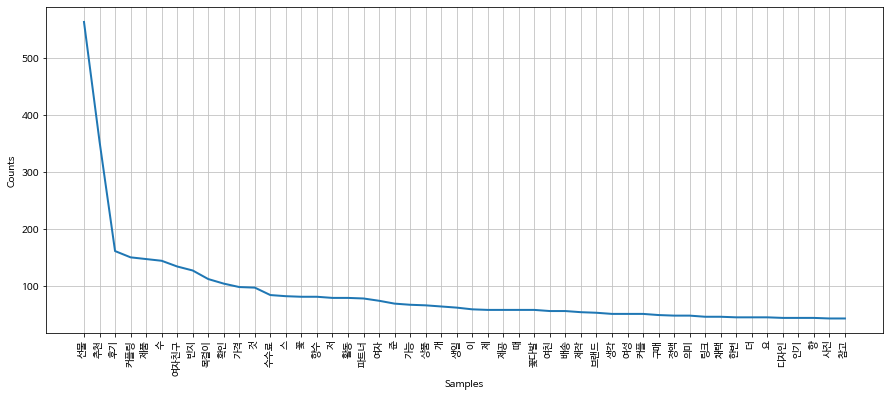

In [29]:
gift=nltk.Text(tokens,name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

In [43]:
stoptext=""" 선물 추천 후기 제품 수 여자친구 확인 가격 것 수수료 스 저 활동 파트너 여자 준 기능 상품 생일 이 제 제공 때 여친 배송 제작 브랜드 생각 여성 커플 구매 정액 의미 링크 더 채택 답변 
인기 참고 분 한번 의미 디자인 혹시 생리통 복부 열기 이번 남자친구 뭔가 감동 절 듯 거의 배 아래 기능 개 요 향 네이버 거 친구 고급 마감 가성 등 비 주문 사용 용 세트 위 쿠팡 변경 안쪽 남자 남녀 사이트
정도 판매 정말 부담 고민 가요 처리 동해 하트 블로그 그냥 요즘 질문 끗 가장 무광 일환 너 도 하나 할인 스토어 직접 미만 이면 조금
"""

In [44]:
stop_words=stoptext.split()
tokens=[token for token in tokens if token not in stop_words]
tokens[:10]

['진동', '마사지', '끈', '소정', '로맨틱', '나무', '사드', '리세', '최근', '꽃']

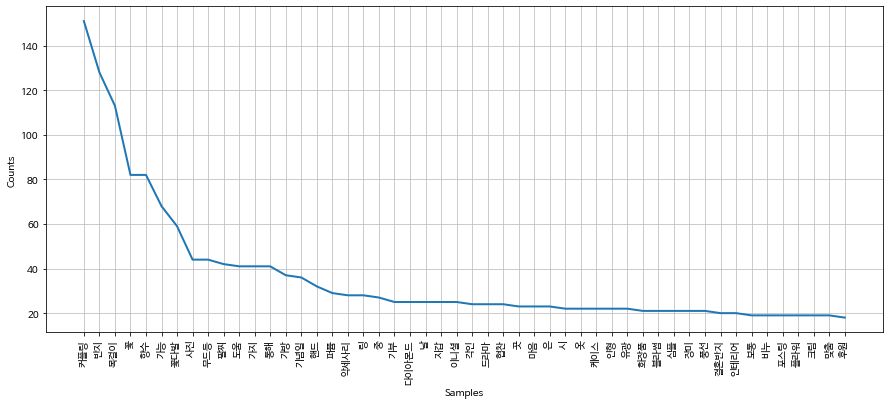

In [45]:
gift=nltk.Text(tokens,name='여친선물')
plt.figure(figsize=(15,6))
gift.plot(50)
plt.show()

워드 클라우드 그리기

In [46]:
from wordcloud import WordCloud
from PIL import Image

In [47]:
data=gift.vocab().most_common(300)
#로컬에서 폰트설정
#font_path:'c:windows\Fonts'
wc=WordCloud(font_path='NanumBarunGothic',relative_scaling=0.2,
             background_color='white').generate_from_frequencies(dict(data))

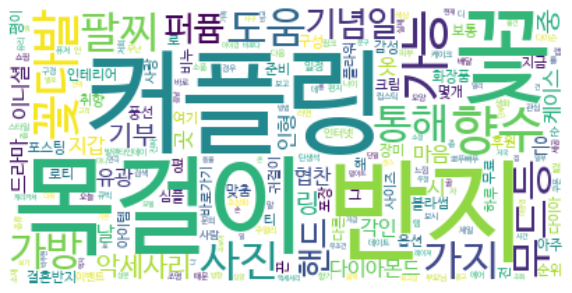

In [48]:
plt.figure(figsize=(10,6))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()